# Profitable App Profiles for the App Store and Google Play Markets

The aim of this project is to find mobile app profiles that are profitable for the App Store and Google Play markets. We are only interested in apps that are free to download and install. Our goal for this project is to analyze data to help the developers understand what kinds of apps are likely to attract more users.


## Opening and Exploring the Data

As of September 2018, there were approximately 2 million iOS apps available on the App Store, and 2.1 million Android apps on Google Play.Let's explore data set containing data about approximately ten thousand Android apps from Google Play and data about approximately seven thousand iOS apps from the App Store.

In [1]:
import pandas as pd

#The Google Play data set
android=pd.read_csv('googleplaystore.csv') #Importing Google Play data

#The App Store data set
ios=pd.read_csv('AppleStore.csv') #Importing App Store data

# Quick exploration of the data
display(android.head())        #.head():Displays first five rows
ios.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1


## Transforming and Cleaning Google Play dataset

The Google Play dataset is in its raw form.The datatypes are not appropriate for some labels whereas some labels contains nan values. The dataset also conatains duplicated rows. So for better analaysis let's first clean the dataset into it's optimal and minimal form.

### 1) Cleaning Google Play Dataset

In [2]:
android.drop_duplicates(inplace=True) #droping duplicate rows from Google dataset

android.drop(columns=['Genres'],inplace=True) #droping 'Genres' column because it's similar to 'category' column.

android['Installs']=android['Installs'].str.strip('+') #removing '+' from 'Installs' column

android['Rating']=android['Rating'].fillna(android.Rating.mean()) #replacing nan values with mean of 'Rating' column

android.dropna(subset=['Type','Content Rating','Current Ver','Android Ver'],inplace=True) #droping NaN values from these columns

### 2) Transforming Google Play Dataset

In [3]:
#Converting 'Last Updated' column into datetime
android['Last Updated']=pd.to_datetime(android['Last Updated']) 

#Converting columns into float
android['Reviews']=android['Reviews'].astype('float') 
android['Installs']=android['Installs'].str.replace(',','').astype('float') #removing ',' from 'Installs' column
android['Price']=android['Price'].str.strip('$').astype('float') 

#Converting below labels into category data type
android[['Type','Category','Content Rating']]=android[['Type','Category','Content Rating']].astype('category')

In [4]:
android.App.value_counts() #showing the number of times a certain app appears

ROBLOX                                              9
8 Ball Pool                                         7
Helix Jump                                          6
Bubble Shooter                                      6
Zombie Catchers                                     6
                                                   ..
IRS W-9 form                                        1
Cardi B Piano Game                                  1
Fake Chat (Direct Message)                          1
Timely Alarm Clock                                  1
GO Launcher - 3D parallax Themes & HD Wallpapers    1
Name: App, Length: 9648, dtype: int64

We don't want to count certain apps more than once when we analyze data, so we need to remove the duplicate entries and keep only one entry per app. One thing we could do is remove the duplicate rows randomly, but we could probably find a better way.

If we examine the rows we printed in cell above 'ROBLOX' appear 9 times. We won't remove rows randomly, but rather we'll keep the rows that have the highest number of reviews because the higher the number of reviews, the more reliable the ratings.To do this we take following steps:

#### Step i) We create a list having the indices of a unique app having highest number of reviews.

In [5]:
lists=[] #creating a list
indices=android.groupby('App').Reviews.max().index #getting all unique apps having max reviews

for app in indices:
    data=android[android.App==app]            #creating a dataset named 'data' having only one unique app with the highest reviews
    max_reviews=data.Reviews.max()                   #extracting the highest number of reviews from 'data'
    max_reviews_index=data[data.Reviews==max_reviews].index.tolist() #extracting the index of app having  highest number of reviews
    lists.append(max_reviews_index)                               #adding the index to the list

The above list 'lists' is a list of lists. So we need to convert it into a single list before using it to slice the Google Play dataset.

In [6]:
#Creating a single list from list of lists
flatList = []
for elem in lists:
    for item in elem:
        flatList.append(item)

#### Step ii) Slicing the Google Play dataset using the list we created above and assigning it to new dataset called 'new'.

In [7]:
new=android.loc[flatList]
new.App.value_counts()

osmino Wi-Fi: free WiFi           2
YouTube Gaming                    2
Candy Bomb                        2
Target - now with Cartwheel       2
Learn C++                         2
                                 ..
DR CONTROL                        1
SMS Park                          1
Wonder5 Masters R                 1
Pediatric Nursing                 1
AK 47 Assault Rifle Wallpapers    1
Name: App, Length: 9648, dtype: int64

The new dataset contains the app having highest number of reviews. But still there are number of apps that appear atleast two times.This happens because the app may have same number of reviews but differ in other columns. Since, we already have the highest number of reviews we will keep the app that appear at last since the app that appears at last are upadated version.

In [8]:
updated=new.drop_duplicates(subset=['App'],keep='last') #keeping the app that appears latter
updated.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,4.189542,27.0,3.6M,500.0,Free,0.0,Everyone,2017-10-07,0.22,4.1 and up
8532,+Download 4 Instagram Twitter,SOCIAL,4.500000,40467.0,22M,1000000.0,Free,0.0,Everyone,2018-08-02,5.03,4.1 and up
324,- Free Comics - Comic Apps,COMICS,3.500000,115.0,9.1M,10000.0,Free,0.0,Mature 17+,2018-07-13,5.0.12,5.0 and up
4541,.R,TOOLS,4.500000,259.0,203k,10000.0,Free,0.0,Everyone,2014-09-16,1.1.06,1.5 and up
4636,/u/app,COMMUNICATION,4.700000,573.0,53M,10000.0,Free,0.0,Mature 17+,2018-07-03,4.2.4,4.1 and up


Our Google Play dataset is now all cleaned and ready to be analaysed.

## Prepairing Apple Store dataset

Now we will prepare Apple Store data set for analyzing.

In [9]:
ios.dtypes

id                    int64
track_name           object
size_bytes            int64
currency             object
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
cont_rating          object
prime_genre          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
dtype: object

As we can see from above,the columns are already in their suitable format. And there is no presence of nan values or dupicate rows. So let's now explore the apps in Apple Store.

In [10]:
ios.track_name.value_counts()

VR Roller Coaster                                2
Mannequin Challenge                              2
Life Cycle - Track Your Time Automatically       1
Hitman GO                                        1
Rugby Nations 16                                 1
                                                ..
Onefootball - Soccer Scores & Live News          1
My Boo Town - Create your own Village of Boos    1
Lastronaut                                       1
Reiner Knizia's Ra                               1
ACDSee Pro                                       1
Name: track_name, Length: 7195, dtype: int64

There are only two apps that are repeated twice. And after exploring those two apps we find the number of user rating in both cases are same.So we only keep the app that appears at last.

In [11]:
ios.drop_duplicates(subset=['track_name'],keep='last',inplace=True)

Our Apple Store dataset is also reasy to be analyzed.

## Isolating the Non-Free Apps

As we mentioned in the introduction, we only build apps that are free to download and install. Our data sets contain both free and non-free apps, and we'll need to use only the free apps for our analysis. Below, we isolate the non-free apps for both our data sets.

In [12]:
#Isolating the non-free apps in Google Play dataset                
updated=updated[updated.Price==0.0] 

#Isolating the non-free apps in Apple Store datase     
ios=ios[ios.price==0.0]

Since our data is now free of non-free apps.Let's perform our analysis of both our datasets to see which app is beneficial to build for both Google Play Store and Apple Store.

## Analysis

In [13]:
#Importing necessary pacakages for visualization of our data
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
sns.set_palette('colorblind')
sns.set_context('notebook')

### 1) Most Popular Apps by Category on Google Play

One way to find out what category are the most popular (have the most users) is to calculate the average number of installs for each app genre.For the Google Play market, we have data about the number of installs, so we should be able to get a clearer picture about category popularity.

Text(0.5, 1, 'Installs V Category')

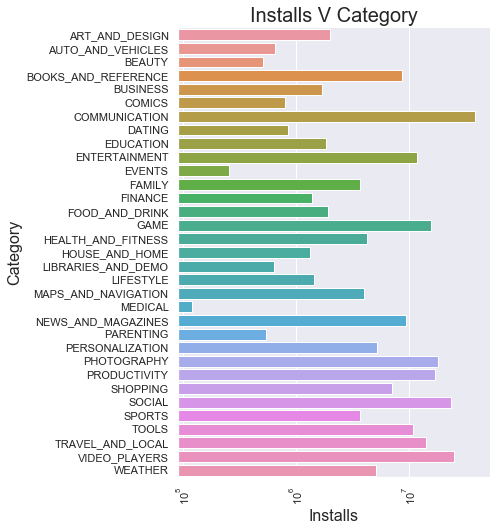

In [14]:
sns.catplot(y='Category',x='Installs',data=updated,kind='bar',ci=None,height=7) #drawing bar chart 
plt.xscale('log')
plt.xticks(rotation=90)
plt.xlabel('Installs',fontsize=16)
plt.ylabel('Category',fontsize=16)
plt.title('Installs V Category',fontsize=20)

On average, communication apps have the most installs. This number is heavily skewed up by a few apps that have over one billion installs (WhatsApp, Facebook Messenger, Skype, Google Chrome, Gmail, and Hangouts).

We see the same pattern for the video players category, which is the runner-up. The market is dominated by apps like Youtube, Google Play Movies & TV, or MX Player. The pattern is repeated for social apps (where we have giants like Facebook, Instagram, Google+, etc.), photography apps (Google Photos and other popular photo editors), or productivity apps (Microsoft Word, Dropbox, Google Calendar, Evernote, etc.).

The main concern is that these app genres might seem more popular than they really are. Moreover, these niches seem to be dominated by a few giants who are hard to compete against.

Other apps like games,news and magazines,entertainment along side books and reference genre looks fairly popular as well.

Now let's analyze the Google Play market a bit.

### 2) Most Popular Apps by Genre on the App Store

For the Google Play data set, we used the information in the Installs column, but for the App Store data set this information is missing. As a workaround, we'll take the total number of user ratings as a proxy, which we can find in the rating_count_tot app.

Text(-66.19999999999999, 0.5, 'prime_genre')

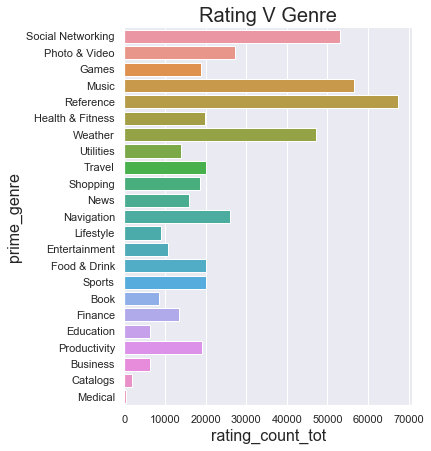

In [15]:
sns.catplot(x='rating_count_tot',y='prime_genre',data=ios,kind='bar',ci=None,height=6)
plt.title('Rating V Genre',fontsize=20)
plt.xlabel('rating_count_tot',fontsize=16)
plt.ylabel('prime_genre',fontsize=16)

From above we see that Reference apps have the highest number of user reviews. So we further explore the Reference column.

In [16]:
reference=ios[ios.prime_genre=='Reference']
reference.groupby('track_name').rating_count_tot.max().sort_values(ascending=False)

track_name
Bible                                                                                                 985920
Dictionary.com Dictionary & Thesaurus                                                                 200047
Dictionary.com Dictionary & Thesaurus for iPad                                                         54175
Google Translate                                                                                       26786
Muslim Pro: Ramadan 2017 Prayer Times, Azan, Quran                                                     18418
New Furniture Mods - Pocket Wiki & Game Tools for Minecraft PC Edition                                 17588
Merriam-Webster Dictionary                                                                             16849
Night Sky                                                                                              12122
City Maps for Minecraft PE - The Best Maps for Minecraft Pocket Edition (MCPE)                          8535
LUCKY BL

From above we can see that there are quite a few apps built around the book Quran, which suggests that building an app around a popular book can be profitable. Since the books and referneces are also popular in Google Play Store.It seems that taking a popular book (perhaps a more recent book) and turning it into an app could be profitable for both the Google Play and the App Store markets.

However, it looks like the market is already full of libraries, so we need to add some special features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes on the book, a forum where people can discuss the book, etc.

## Conclusion

In this project, we analyzed data about the App Store and Google Play mobile apps with the goal of recommending an app profile that can be profitable for both markets.

We concluded that taking a popular book (perhaps a more recent book) and turning it into an app could be profitable for both the Google Play and the App Store markets. The markets are already full of libraries, so we need to add some special features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes on the book, a forum where people can discuss the book, etc.